# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
# "index_col = 0" what this actually did is it converted 1st column of the data set to index
data = pd.read_csv("Classified Data", index_col = 0)

In [3]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

"""As we noticed we have a bunch of data but we just have a target class column 1 or 0 
   and essentially just random letters for the column names and this is just annonymised 
   classified data so we don't know what any of these no. represent or we also don't know what
   these column name represent.
   We just know that we need to use these features that are unknown to us as far as what they 
   actually represent in order to predict a target class 1 or 0.
   Because the KNN classifier predicts a class of a given test observation by identifying the
   observations that are nearest to it the scaled variable actually matters a lot in any 
   variables that are on a large scale will have a much larger affect on the distance between 
   observation and because of this when we are using KNN as classifier which is going to want 
   a do is try to standardise everything to the same scale.
   Luckily, scikit actually has a lot of built in tools to help us through this process by using 
   from sklearn preprocessing import StandardScaler"""

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(data.drop(["TARGET CLASS"], axis = 1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(data.drop("TARGET CLASS", axis = 1))

In [12]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [16]:
data_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [18]:
X = data.drop("TARGET CLASS", axis = 1)
Y = data["TARGET CLASS"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [31]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
confusion_matrix(pred, Y_test)

array([[150,  13],
       [  9, 128]], dtype=int64)

In [37]:
print(classification_report(pred, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       163
           1       0.91      0.93      0.92       137

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [39]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

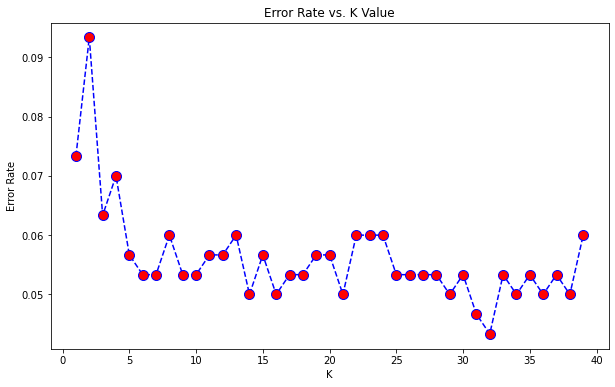

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [42]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=1


[[150   9]
 [ 13 128]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.93      0.91      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [45]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=17


[[153   6]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.93      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

